# Part 1: Data Cleaning and Preprocessing

## 1.1 Load and Inspect the Dataset
    a. Load the dataset and display its shape, colum names, and data types


In [1107]:
import pandas as pd
df = pd.read_csv("Building_Energy_Benchmarking.csv")
df.head(3)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956


In [1108]:
print("Shape:", df.shape)
print(('_'*70))
print("List of columns:\n", df.columns)
print(('_'*70))
print("Data Types:\n")
df.info()

Shape: (494, 31)
______________________________________________________________________
List of columns:
 Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite 

    b. Identify and list the number of missing values in each column

In [1110]:
# Detect Missing Values in the DataFrame
df.isnull()

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [1111]:
# Count Missing Values per Column
df.isna().sum()

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)                                    0

## 1.2 Handling Missing Data
    a. Drop columns with more then 40% missing values
    b. For numerical columns, fill missing values with the median of their respective column
    c. For categorical colums, fill missing values with the mode oftheir respective column

In [1113]:
# Percentage of missing data
missing_data = df.isnull().mean() * 100
print("Percentage of Missing Data per Column:\n")
print(missing_data)

Percentage of Missing Data per Column:

Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                           

In [1114]:
# Drop columns/rows with more than 40% missing values
df_cleaned = df.drop(columns=missing_data[missing_data > 40].index)
df_cleaned = df_cleaned.dropna(thresh=int(df_cleaned.shape[1] * 0.6), axis=0)
df_cleaned.head(3)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956


In [1115]:
df_cleaned.isna().sum()

Property Id                                    0
Property Name                                  0
Address 1                                      0
City                                           0
Postal Code                                    0
Province                                       0
Primary Property Type - Self Selected          0
Number of Buildings                            0
Year Built                                     0
Property GFA - Self-Reported (m²)              0
Site Energy Use (GJ)                           0
Weather Normalized Site Energy Use (GJ)        0
Site EUI (GJ/m²)                               0
Weather Normalized Site EUI (GJ/m²)            0
Source Energy Use (GJ)                         0
Weather Normalized Source Energy Use (GJ)      2
Source EUI (GJ/m²)                             0
Weather Normalized Source EUI (GJ/m²)          0
Total GHG Emissions (Metric Tons CO2e)         0
Total GHG Emissions Intensity (kgCO2e/m²)      0
Direct GHG Emissions

In [1116]:
#mpute missing values in numerical columns using the median/Categorical columns using the mode.
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].median())

categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(df_cleaned[categorical_columns].mode().iloc[0])

## 1.3 Extracting and Cleaning Data Using Regex
    a. Extract numeric values from text-based numeric columns (e.g., Property GFA, Energy Use, Emissions)
    b. Standardize Postal Codes to follow the Canadian format (A1A 1A1)
    c. Clean and extract meaningful text from Property Names and Addresses
    d. Ensure extracted values are properly converted to numerical types for analysis

In [1118]:
import re
#Find object columns with numerical value
def find_str_num(df):                                                                      
    numeric_columns = []         #Initializing list to store col name that are str and contains int                                                    
    for col in df.select_dtypes(include=['object']).columns:              #loop through all string columns of df            
        if df[col].astype(str).str.match(r'^-?\d+(\.\d+)?$', na=False).any():    #if at least 1 value matches, is considered num    
            numeric_columns.append(col)                    #if previous line is true, the column name is stored                           
    return numeric_columns
column_names = find_str_num(df_cleaned)                     #function applied to df_cleaned, later I will extract the num values frm these columns
print(('_'*70))
print("Columns w Numeric values in text-based format:\n")
print(column_names)

______________________________________________________________________
Columns w Numeric values in text-based format:

['Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)']


In [1119]:
#Extract the numerical values from 'object' columns
for col in column_names:                                                 #iterates through the list of column names
#transform-uses regular expresion to find num values in string 
#convert x to str before applying re find all, in case where x is not a string
#return the matches and converts the extracted number to float, is no matches, return None
    df_cleaned[col] = df_cleaned[col].apply(lambda x: float(re.findall(r'-?\d+\.?\d*', str(x))[0]) if re.findall(r'-?\d+\.?\d*', str(x)) else None)

#Standardize Postal Codes to follow the Canadian format (A1A 1A1) - I will use a function
#the upper converts to Capital letters
#\w\d\w these represent the 3 first characteres, as letter, digit, letter
#\s? matches if the space exist or no
#\d\w\d these represent the 3 last characteres, as digit, letter, digit
#r'\1 \2'these is the replacement : 1st group, space, 2nd group
df['Postal Code'] = df['Postal Code'].str.upper().str.replace(r'(\w\d\w)\s?(\d\w\d)',r'\1 \2', regex=True)
print(('_'*70))
print("Standardized Postal Codes:\n")
df.head(3)  

______________________________________________________________________
Standardized Postal Codes:



,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,T2E 7L7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956


In [1120]:
#Clean and extract meaningful text from Property Names and Addresses
#This taks looks for a personal approach, so I will standardize the Address information
df['Address 1']=df['Address 1'].replace({
    r'(?i)\bSt\b':'Street',
    r'(?i)\bBv\b':'Boulevard',
    r'(?i)\bBlv\b':'Boulevard',
    r'(?i)\bBvd\b':'Boulevard',
    r'(?i)\bAv\b':'Avenue',
    r'(?i)\bAve\b':'Avenue',
    r'(?i)\bTr\b': 'Trail',
    r'(?i)\bRd\b':'Road',
    r'(?i)\bDv\b':'Drive',
     r'(?i)\bDr\b':'Drive',
    r'(?i)\bGa\b':'Gate',
    r'(?i)\bGt\b':'Gate',
    r'(?i)\bW\b':'Way',
    r'(?i)\bNE\b':'North East',
    r'(?i)\bNW\b':'North West',
    r'(?i)\bSE\b':'South East',
    r'(?i)\bSW\b':'South Weast',},regex=True)
#I will aslso delete the city and postal code that appear in this columns
#There are already columns for those variable, so it is unnecessary to have them here
df['Address 1']=df['Address 1'].str.replace(r', Calgary.*$','',regex=True)

#The last step for this column is to guarantee a uniform style
df['Address 1']=df['Address 1'].str.strip().str.title()

#Visualize changes
print(df['Address 1'])

0           9009 Fairmount Drive South East
1                 2924 11 Street North East
2                  315 10 Avenue South East
3                   133 6 Avenue South East
4           2201 Portland Street South East
                       ...                 
489                311 34 Avenue South East
490               4705 76 Avenue South East
491     1940 Westmount Boulevard North West
492             2607 106 Avenue South Weast
493    10071 Hidden Valley Drive North West
Name: Address 1, Length: 494, dtype: object


In [1121]:
#Ensure extracted values are properly converted to numerical types for analysis.
print(('_'*70))
print("Data convertion validation:\n")
print(df_cleaned.info())
print("Here we can confirm the transformation was successful by comparing the Dtype\n"
      "of Columns such as 'Property GFA -Self...', 'Site Energy U..', and "
      "'Weather Normalized Site E..', which were object in the original df.")



______________________________________________________________________
Data convertion validation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Id                                 494 non-null    int64  
 1   Property Name                               494 non-null    object 
 2   Address 1                                   494 non-null    object 
 3   City                                        494 non-null    object 
 4   Postal Code                                 494 non-null    object 
 5   Province                                    494 non-null    object 
 6   Primary Property Type - Self Selected       494 non-null    object 
 7   Number of Buildings                         494 non-null    int64  
 8   Year Built                                  494 non-null    

# Part 2: Exploratory Data Analysis (EDA) and Aggregations

## 2.1 Statistical Summary
    a. Generate summary statistics for numerical features using extracted data
    b. Identify and explain key observations (e.g., outliers, mean vs. median differences).


In [1123]:
# Summary statistics for numerical features using extracted data
                                                         
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns               #For the stat analysis I need numerical data
statistics = df_cleaned.drop(columns=["Property Id","Number of Buildings","Year Built","Year Ending","Unique ID"]).describe()  #Filter Num columns
statistics

,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,1974.198583,3586.745951,3699.120445,1.774798,1.810324,4556.838259,4160.757490,2.282753,2.319717,442.468623,158.671660,213.686235,63.821862,2.539227e+05,2526.025709
std,6799.500086,15596.320164,15776.584078,1.306700,1.331529,18232.674955,17313.249689,1.597846,1.622897,1078.852509,109.472637,713.805808,56.835735,8.348778e+05,13849.406262
min,1.000000,1.000000,1.000000,0.060000,0.060000,1.000000,1.000000,0.110000,0.110000,1.000000,10.200000,0.000000,0.000000,1.000000e+00,1.000000
25%,2.000000,3.000000,3.000000,0.990000,1.000000,4.000000,4.000000,1.312500,1.350000,77.125000,93.100000,41.000000,33.325000,1.132500e+02,4.000000
50%,216.950000,79.500000,81.000000,1.290000,1.310000,36.500000,36.500000,1.680000,1.690000,173.000000,117.600000,74.000000,43.900000,4.620000e+02,472.600000
75%,1448.750000,1558.500000,1677.500000,2.065000,2.110000,2079.250000,1963.250000,2.622500,2.652500,446.200000,186.975000,223.075000,74.050000,1.491705e+05,1034.000000
max,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.618602e+06,238415.000000


In [1124]:
# Outliers, mean vs. median differences
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns #Only numerical column
data_Stats = df_cleaned[numerical_columns].drop(columns=["Property Id", "Number of Buildings", "Year Built", "Year Ending", "Unique ID"], errors="ignore")

Q1 = data_Stats.quantile(0.25)                      #I am using the IQR Method, this can also be confirmed with a boxplot
Q3 = data_Stats.quantile(0.75)
IQR = Q3 - Q1
LL = Q1 - 1.5 * IQR                                  #Lower and Upper Limits for Outliers
UL = Q3 + 1.5 * IQR
Outliers = (data_Stats < LL) | (data_Stats > UL)     # Identify outliers
Outliers_count=Outliers.sum()
Outliers_Percentage=(Outliers_count/(len(data_Stats)))*100
mean=data_Stats.mean()                               #Estimation of mean
median=data_Stats.median()                           #Estimation of median
diff_men_median=((mean-median)/mean)*100                 #Checkin %difference

#Since I prefer to have all the estimations in one table, I will add this to the sum stat displayed above
sum_stat.loc["Outlier Count"]=Outliers.sum()
sum_stat.loc["Outlier percentage"]=Outliers_Percentage
sum_stat.loc["Mean"]=mean
sum_stat.loc["Median"]=median
sum_stat.loc["Mean vs Meadian"]=diff_men_median
sum_stat

,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,1974.198583,3586.745951,3699.120445,1.774798,1.810324,4556.838259,4160.757490,2.282753,2.319717,442.468623,158.671660,213.686235,63.821862,2.539227e+05,2526.025709
std,6799.500086,15596.320164,15776.584078,1.306700,1.331529,18232.674955,17313.249689,1.597846,1.622897,1078.852509,109.472637,713.805808,56.835735,8.348778e+05,13849.406262
min,1.000000,1.000000,1.000000,0.060000,0.060000,1.000000,1.000000,0.110000,0.110000,1.000000,10.200000,0.000000,0.000000,1.000000e+00,1.000000
25%,2.000000,3.000000,3.000000,0.990000,1.000000,4.000000,4.000000,1.312500,1.350000,77.125000,93.100000,41.000000,33.325000,1.132500e+02,4.000000
50%,216.950000,79.500000,81.000000,1.290000,1.310000,36.500000,36.500000,1.680000,1.690000,173.000000,117.600000,74.000000,43.900000,4.620000e+02,472.600000
75%,1448.750000,1558.500000,1677.500000,2.065000,2.110000,2079.250000,1963.250000,2.622500,2.652500,446.200000,186.975000,223.075000,74.050000,1.491705e+05,1034.000000
max,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.618602e+06,238415.000000
Outlier Count,62.000000,79.000000,79.000000,45.000000,44.000000,80.000000,74.000000,50.000000,51.000000,30.000000,42.000000,30.000000,55.000000,7.500000e+01,76.000000
Mean,1974.198583,3586.745951,3699.120445,1.774798,1.810324,4556.838259,4160.757490,2.282753,2.319717,442.468623,158.671660,213.686235,63.821862,2.539227e+05,2526.025709


### Key Observations:
The presence of outliers indicates that the distribution has heavier tails and high variability. It may also indicates that data exhibits skweness. When analyzing the proportion of outliers, it is surpising that in most of variables, the data can contains more than 10% of extreme values, which could mean that energy metrics are highly impacted by external factors as property type, location, or that data quality is not guarenteed.

Regarding the mean and the median, the mean tends to be much higher than the median, suggesting energy metrics tend to have a positive skewness, so it is righ skewed.

## 2.2 Aggregations
    a. Compute the average Energy Use Intensity (EUI) by Property Type
    b. Compute the total Greenhouse Gas (GHG) emissions by year
    c. Identify the top 5 properties with the highest total energy consumption

In [1127]:
# Average Energy Use Intensity (EUI) by Property Type.
#It is considered that there are 4 columns of EUI variables
#The index False keeps the property column as a regular column- this is just a visual preference
EUI_by_Property = df_cleaned.groupby('Primary Property Type - Self Selected', as_index=False).agg(
    Avg_Site=('Site EUI (GJ/m²)', 'mean'), Avg_Weather_Site=('Weather Normalized Site EUI (GJ/m²)', 'mean'),
    Avg_Source=('Source EUI (GJ/m²)', 'mean'),Avg_Weather_Source=('Weather Normalized Source EUI (GJ/m²)', 'mean'))
EUI_by_Property

,Primary Property Type - Self Selected,Avg_Site,Avg_Weather_Site,Avg_Source,Avg_Weather_Source
0,Distribution Center,3.286000,3.284000,3.496000,3.492000
1,Fire Station,1.208827,1.223799,1.572849,1.587263
2,Fitness Center/Health Club/Gym,4.385000,4.472250,5.306750,5.398000
3,Heated Swimming Pool,4.805333,4.924000,5.895333,6.020000
4,Ice/Curling Rink,2.182200,2.220800,2.862400,2.903400
5,Indoor Arena,1.106000,1.148000,1.358000,1.404000
6,Mixed Use Property,0.458000,0.470000,0.522000,0.534000
7,Museum,1.584000,1.652000,2.050000,2.124000
8,Non-Refrigerated Warehouse,0.768000,0.781333,1.039333,1.052667
9,Office,1.519636,1.561000,2.072545,2.115364


In [1128]:
# Total Greenhouse Gas (GHG) emissions by year
#Grouping the data by Year Ending the column "Total GHG Emissions (Metric Tons CO2e"
Total_GHG_year = df_cleaned.groupby('Year Ending').agg(
    Total_GreenhouseGas=('Total GHG Emissions (Metric Tons CO2e)', 'sum'),
).reset_index()                                            #converts the gouped data into a df, Year Ending is regular column here

Total_GHG_year

,Year Ending,Total_GreenhouseGas
0,2019,22799.1
1,2020,24036.9
2,2021,24310.5
3,2022,72301.0
4,2023,75132.0


In [1129]:
#Top 5 properties with the highest total energy consumption
Top_5 = df_cleaned.groupby('Property Name').agg(Total_Energy_Consumption=('Site Energy Use (GJ)', 'sum'),).reset_index()
Top_5 = Top_5[['Property Name', 'Total_Energy_Consumption']].sort_values('Total_Energy_Consumption', ascending=False).head(5)
Top_5.head(5)  

,Property Name,Total_Energy_Consumption
92,Stoney Transit Facility,404009.0
74,Municipal Complex,159191.0
95,Village Square Leisure Centre,156126.0
89,Southland Leisure Centre,112232.0
58,Foothills Aquatic Centre and Bauer and Bush Ar...,51800.0


## 2.3 Detecting Outliers Using Regex and IQR
    a. Identify values that do not conform to expected numeric formats (Regex)
    b. Remove or correct incorrectly formatted numeric values (Regex)
    c. Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e)
    d. Replace outliers with the median value for that property type.

In [1131]:
#Values that do not conform to expected numeric formats.
#If a column data type is int64, it does not contains strings or values diff to integer values
#I do not need to check in int64. I need to check columns w float64 data type
#Reg expression r'^\d+\.0$' - Here I am checking if it starts with one or more digits and if it ends w .0

def mixed_datatypes(df):                                                            
    float_columns = df.select_dtypes(include=['float64']).columns                   #Filtering columns to anlyze
    int_in_float = []                                                               #Store columns type float that contains Int format values
    for column in float_columns:                                                    #loop through all float64 data type columns of df    
        contains_int = df[column].apply(lambda x: bool(re.match(r'^\d+\.0$', str(x))) if pd.notna(x) else False).any()
        if contains_int:
            int_in_float.append(column)                                             # If result is diff to False, it will be stored
    return int_in_float
    
wrong_format = mixed_datatypes(df_cleaned)                                            #Apply the function to the cleaned DF
print("Float64 columns containing at least one int formaat value:")
wrong_format

Float64 columns containing at least one int formaat value:


['Property GFA - Self-Reported (m²)',
 'Site Energy Use (GJ)',
 'Weather Normalized Site Energy Use (GJ)',
 'Site EUI (GJ/m²)',
 'Weather Normalized Site EUI (GJ/m²)',
 'Source Energy Use (GJ)',
 'Weather Normalized Source Energy Use (GJ)',
 'Source EUI (GJ/m²)',
 'Weather Normalized Source EUI (GJ/m²)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Total GHG Emissions Intensity (kgCO2e/m²)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions Intensity (kgCO2e/m²)',
 'Electricity Use - Grid Purchase (kWh)',
 'Natural Gas Use (GJ)']

In [1132]:
#Removal or correction of incorrectly formatted numeric values.
#df_cleaned[wrong_format] = df_cleaned[wrong_format].astype('int64')      #Convert the identified columns to int


In [1133]:
print("Data convertion validation:\n")
print(df_cleaned.info())

Data convertion validation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Id                                 494 non-null    int64  
 1   Property Name                               494 non-null    object 
 2   Address 1                                   494 non-null    object 
 3   City                                        494 non-null    object 
 4   Postal Code                                 494 non-null    object 
 5   Province                                    494 non-null    object 
 6   Primary Property Type - Self Selected       494 non-null    object 
 7   Number of Buildings                         494 non-null    int64  
 8   Year Built                                  494 non-null    int64  
 9   Property GFA - Self-Reported (m²)           494 non-null  

In [1134]:
#IQR Method to detect ouliers in Total GHG Emissions (Metric Tons CO2e)
data_GHG = df_cleaned['Total GHG Emissions (Metric Tons CO2e)']
rows=len(data_GHG)
Q1 = data_GHG.quantile(0.25)                      #Percentile 25
Q3 = data_GHG.quantile(0.75)                      #Percentile 75
IQR = Q3 - Q1
LL = Q1 - 1.5 * IQR                                #Lower and Upper Limits for Outliers
UL = Q3 + 1.5 * IQR
Outliers = (data_GHG < LL) | (data_GHG > UL)       # Identify outliers
Outliers_Count=Outliers.sum()
Outliers_Perc=(Outliers_Count/rows)*100
print(f"There are {Outliers_Count} outliers in Total GHG Emission values")
print(f"The outlier amount represents: {Outliers_Perc:.2f}% of Total GHG Emission records")

There are 30 outliers in Total GHG Emission values
The outlier amount represents: 6.07% of Total GHG Emission records


In [1135]:
median_GHG=data_GHG[(data_GHG >= LL) & (data_GHG <= UL)].median()   #Median of non outliers
median_GHG
df_cleaned.loc[Outliers, "Total GHG Emissions (Metric Tons CO2e)"] = median_GHG #Replacing outliers with median_GHG
display(df_cleaned.head(4))

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.00,276.7,280.0,152.4,368616.0,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.00,118.4,243.0,31.2,1091854.0,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.00,74.6,0.0,0.0,508589.0,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,159.45,74.0,26.0,1.5,1152308.0,506.0,2023,2023-8854296


# Part 3: Data Visualization

## 3.1 Time Series Visualization
    a. Plot the yearly trend of average Site Energy Use Intensity (EUI)
    b. Highlight any significant increases or decreases in energy usage


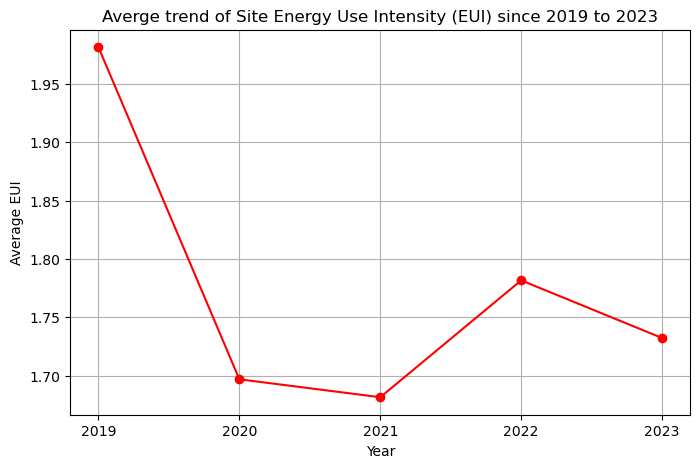

In [1137]:
#To plot the yearly trend, I need to grop the variable by year and apply the mean
avg_EUI = df_cleaned.groupby(['Year Ending']).agg(Avg_EUI = ('Site EUI (GJ/m²)','mean')).reset_index()

import matplotlib.pyplot as plt
import numpy as np

#Setting figure size
plt.figure(figsize=(8, 5))
#Setting general parameters to plot
plt.plot(avg_EUI['Year Ending'],avg_EUI['Avg_EUI'],marker='o',linestyle='-', color='r')
#Stting x-axis to avoid innacurate representation, example 2019,5 instead of 2019
plt.xticks(np.arange(avg_EUI['Year Ending'].min(), avg_EUI['Year Ending'].max() + 1, 1))
#Defining titles and labels
plt.title('Averge trend of Site Energy Use Intensity (EUI) since 2019 to 2023')
plt.xlabel('Year')
plt.ylabel('Average EUI')
#Grid for the background and have better visual
plt.grid()
plt.show()

### Graph Highlights:
The energy use intensity showed a significant drop in 2020, which was a particular year due to the pandemic. The EUI reflects a behavior that was not only seen in Canada, but globally, because many companies had to stop their operations or reduce the activity, impacting the energy consumed by offices, factories and buildings in general.

## 3.2 Comparative Bar Charts
    a. Create a bar chart showing the top 10 building with the highest GHG emissions
    b. Annotate the bar chart with emission values.

In [1140]:
#To guarantee the results, I will remove commas and use the original data, this column did not have
#missing values in the original df, since this variable was one of the variable w less outliers percentage
#the ranking will consider all the data
df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].astype(str).str.replace(',', '').astype('float')
#df['Total GHG Emissions (Metric Tons CO2e)'].tail(50)


In [1141]:
#To plot bar chart showing GHG emissions by building, I need to group the variable by building and apply sum
Top_GHG = df.groupby(['Primary Property Type - Self Selected']).agg(
Top_GHG_Emissions=('Total GHG Emissions (Metric Tons CO2e)', 'sum')).reset_index().sort_values(by = ['Top_GHG_Emissions'], ascending=False).head(10)
Top_GHG

,Primary Property Type - Self Selected,Top_GHG_Emissions
9,Office,119298.5
2,Fitness Center/Health Club/Gym,65107.3
4,Ice/Curling Rink,53827.2
0,Distribution Center,40166.9
1,Fire Station,28186.3
8,Non-Refrigerated Warehouse,16079.7
3,Heated Swimming Pool,9334.2
14,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",8331.0
5,Indoor Arena,7302.9
15,Self-Storage Facility,2603.8


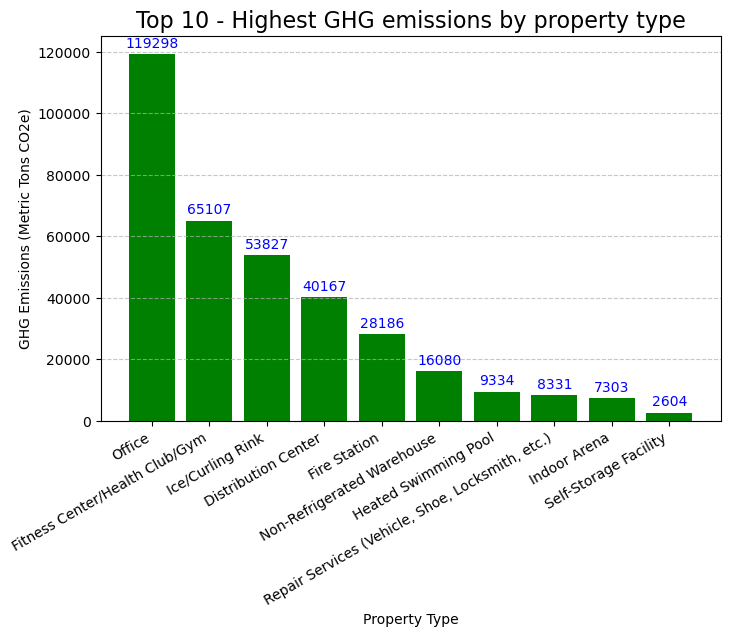

In [1142]:
#Size fig
plt.figure(figsize = (8,5))
bars = plt.bar(x=Top_GHG['Primary Property Type - Self Selected'],height=Top_GHG['Top_GHG_Emissions'],color='g')
plt.bar_label(bars,fmt='%.0f',padding=3,fontsize=10,color='b')
#Title and lables
plt.title('Top 10 - Highest GHG emissions by property type', fontsize=16)
plt.xlabel('Property Type')
plt.ylabel('GHG Emissions (Metric Tons CO2e)')
plt.xticks(rotation=30, ha='right')    #for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3.2 Heatmap Visualization
    a. Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property types

In [1144]:
import matplotlib.pyplot as plt
import seaborn as sns

Site_EUI = df.groupby(['Primary Property Type - Self Selected','Year Ending']).agg(
    Total_Site_EUI=('Site EUI (GJ/m²)', 'sum')).reset_index()

heat_map_data = Site_EUI.pivot(index = 'Primary Property Type - Self Selected', columns = 'Year Ending', values = 'Total_Site_EUI')
heat_map_data

Year Ending,2019,2020,2021,2022,2023
Primary Property Type - Self Selected,,,,,
Distribution Center,1.68,2.30,3.32,3.63,5.50
Fire Station,46.91,44.77,43.56,43.52,37.62
Fitness Center/Health Club/Gym,43.01,30.47,31.40,34.74,35.78
Heated Swimming Pool,16.89,12.70,12.96,14.44,15.09
Ice/Curling Rink,24.02,20.37,18.76,23.00,22.96
Indoor Arena,1.39,1.16,0.97,1.01,1.00
Mixed Use Property,0.56,0.33,0.52,0.48,0.40
Museum,1.70,1.61,1.46,1.60,1.55
Non-Refrigerated Warehouse,2.50,2.23,2.32,2.33,2.14


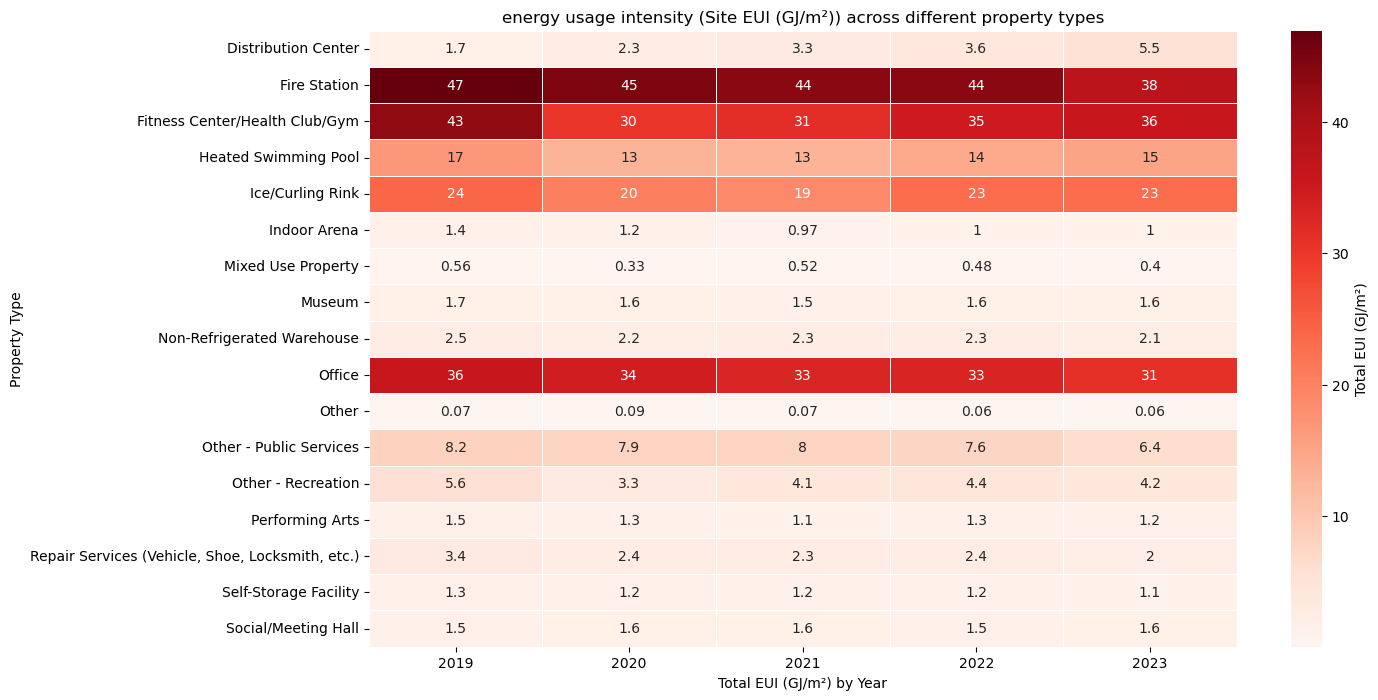

In [1145]:
# Set up the figure and axes
plt.figure(figsize=(14, 8)) 
sns.heatmap(heat_map_data,cmap="Reds", annot=True, linewidths=0.5,  cbar_kws={'label': 'Total EUI (GJ/m²)'})

# Add titles and labels
plt.title('Energy usage intensity (Site EUI (GJ/m²)) across different property types')
plt.xlabel('Total EUI (GJ/m²) by Year')
plt.ylabel('Property Type')
plt.show()

# Part 4: Further Analysis

## 4.1 Correlation Analysis
    a. Compute and visualize the correlation matrix between energy consumption, emissions, and building size
    b. Identify any strong correlations and explain their implications


In [1147]:
#df['Property GFA - Self-Reported (m²)']
#df['Total GHG Emissions (Metric Tons CO2e)']
#df['Natural Gas Use (GJ)']
#df['Site Energy Use (GJ)']

In [1148]:
# For the correlation I will convert the columns to numeric 
df['Property GFA - Self-Reported (m²)'] = df['Property GFA - Self-Reported (m²)'].astype(str).str.replace(',', '').astype('float')
df['Site Energy Use (GJ)'] = df['Site Energy Use (GJ)'].astype(str).str.replace(',', '').astype('float')
df['Natural Gas Use (GJ)'] = df['Natural Gas Use (GJ)'].astype(str).str.replace(',', '').astype('float')
df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].astype(str).str.replace(',', '').astype('float')

In [1149]:
# The correlation will consider Site Energy Use and Natural Gas Use, the second one is selected
#because in the energy industry this is consider an energy source and it is widely use
Variables_Corr = ['Site Energy Use (GJ)', 'Natural Gas Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']

# Correlation matrix
df_corr = df[Variables_Corr].corr()
df_corr

,Site Energy Use (GJ),Natural Gas Use (GJ),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (m²)
Site Energy Use (GJ),1.000000,0.904542,0.923281,0.725977
Natural Gas Use (GJ),0.904542,1.000000,0.676375,0.400952
Total GHG Emissions (Metric Tons CO2e),0.923281,0.676375,1.000000,0.880927
Property GFA - Self-Reported (m²),0.725977,0.400952,0.880927,1.000000


### Correlations Highlights:
In general terms, all correlations among the four chosen variables are positive. It is important to consider that this correlation matrix relies on linear correlations, which were assumed for generating the matrix.

Property size is highly correlated with total GHG emissions, which makes sense in the real world, as we expect larger buildings, such as distribution centers, to have higher GHG emissions compared to smaller buildings, such as offices.

Regarding energy use, building size shows a stronger correlation with site energy use (which could represent regular electricity consumption) than with natural gas consumption. This also aligns with real-world expectations. For example, consider an office where 20 people work and a fitness center that receives more than 100 users daily. Both buildings may have only one kitchen with a single gas stove, so it makes sense that different-sized buildings could consume a similar amount of gas and therefore the correlation between building size and gas consumption is not strong compared to the correlation between Electricity consumption and building size.


## 4.2 Hypothesis Testing
a.  Conduct a t-test (t-test is used to compare the means of two groups to determine if they are significantly diferent from each other) comparing the average Energy Star Score between two different property types (e.g., Offices vs. Residential  buildings).

b. Interpret the results and discuss statistical significance

In [1152]:
from scipy.stats import ttest_ind
#The Energy Star Score was dropped because it had more than 40% of missing values
#Considering hypothesis test are a powerful methodology to do inference from sample to population, 
#it is not recommended to do it with a variable that has not been well recorded
#For this Hypothesis test I will Use Toto GHG Emission, because the outliers were handled previouly
display(df_cleaned.head(5))                     #printing df to verify values and outliers replacement

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.00,276.7,280.0,152.4,368616.0,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.00,118.4,243.0,31.2,1091854.0,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.00,74.6,0.0,0.0,508589.0,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,159.45,74.0,26.0,1.5,1152308.0,506.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,4.00,4.27,568.00,265.2,253.0,118.1,508594.0,4926.0,2023,2023-21988603


In [1153]:
Property_1 = 'Office'
Property_2 = 'Distribution Center'
Total_GHG = 'Total GHG Emissions (Metric Tons CO2e)'

Office = df[df['Primary Property Type - Self Selected'] == Property_1][Total_GHG].dropna()
D_Center = df[df['Primary Property Type - Self Selected'] == Property_2][Total_GHG].dropna()

t_stat, p_value = ttest_ind(Office, D_Center, equal_var=False)
print(f"T: {t_stat:.4f}, P-value: {p_value:.4f}")

T: -4.7034, P-value: 0.0085


### T test results interpretation:
The T: -4.7034, indicates that the mean Total GHG Emissions of Offices is significantly lower than that of Distribution Centers and the P-value: 0.0085 lower than the significance level (0.05), indicates the Ho must be rejected. The test designed considered Ho as the means of the 2 properties as equal, here we have strong evidence to say that Total GHG Emissions for Offices and Distribution Centers are statistically different.

This result aligns with real-world expectations, as larger buildings like Distribution Centers tend to have higher energy demands and emissions compared to smaller office spaces.

# Part 5: Reporting and Insights

## 5.1 Summary Report
    a. Write a structured report (300-500 words) covering:
        + Key trends in energy consumption and efficiency
        + Seasonal and property type variations
        + Recommendations for improving energy efficiency and reducing emissions
    b. Include supporting visualizations with clear titles, labels, and legends
    c. Submit the GitHub repository link in the report on D2L along with the Jupyter Notebook
    d. Highlight in the report where Regex was used for data cleaning and extraction
    

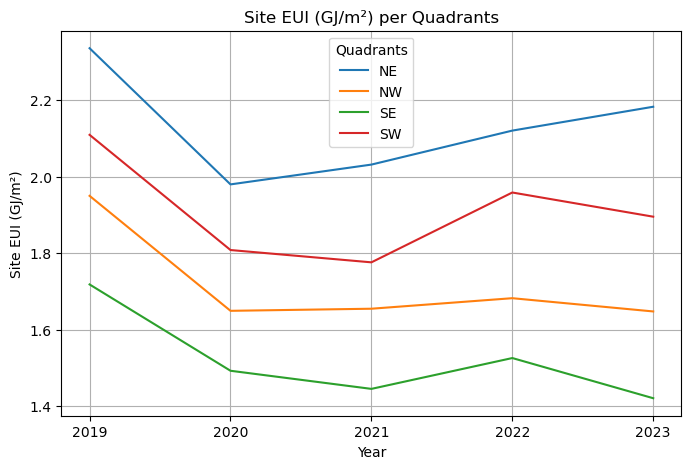

In [1239]:
# This part of the repository will contains additional graphs for the report

df_cleaned['Quadrant'] = df_cleaned['Address 1'].str.extract(r'(SE|NE|SW|NW)', flags=re.IGNORECASE)[0].str.upper() # Extract and convert
pivot_df = df_cleaned.groupby(['Quadrant', 'Year Ending'])['Site EUI (GJ/m²)'].mean().unstack() #grouping data

plt.figure(figsize=(8, 5))
for Quadrant in pivot_df.index:
    plt.plot(pivot_df.columns.astype(str), pivot_df.loc[Quadrant], label=Quadrant)

# Formatting
plt.title('Site EUI (GJ/m²) per Quadrants')
plt.xlabel('Year')
plt.ylabel('Site EUI (GJ/m²)')
plt.legend(title='Quadrants')
plt.grid(True)
plt.show()


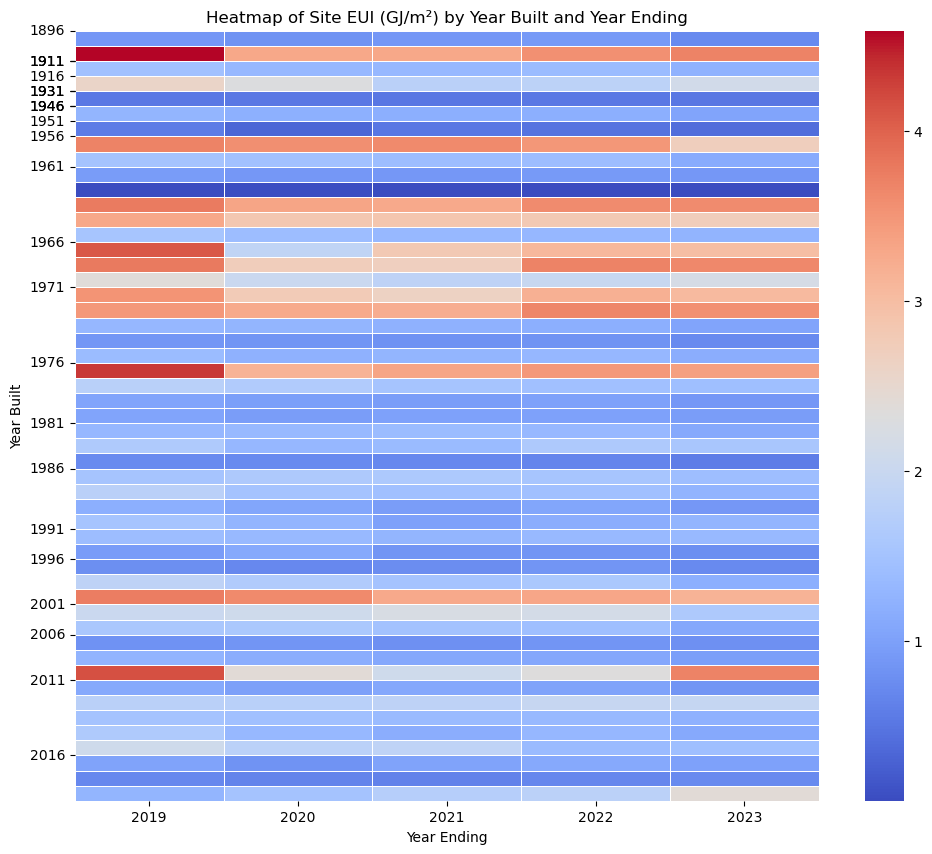

In [1225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for heatmap - I believe year built impact the Energy efficiency
heatmap_data = Graph_data.pivot(index='Year Built', columns='Year Ending', values='total')
plt.figure(figsize=(12, 10))               #Adjusting size
ax = sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.5) #many data to have annotations

year_built_ticks = np.arange(heatmap_data.index.min(), heatmap_data.index.max()+1, 5) #Steps of 5 years to Year Built
ax.set_yticks(np.searchsorted(heatmap_data.index, year_built_ticks)) # Applying steps in axis
ax.set_yticklabels(year_built_ticks)   #replace the default y-axis labels with the 5-year steps

# Labels and title
plt.xlabel('Year Ending')
plt.ylabel('Year Built')
plt.title('Heatmap of Site EUI (GJ/m²) by Year Built and Year Ending')

plt.show()



## 5.1 Summary Report
The analysis of energy efficiency per quadrant reveals that the Northeast (NE) quadrant has consistently exhibited the highest energy consumption per square meter over the past five years. In contrast, the Southeast (SE) quadrant has consistently shown the lowest energy consumption per habitable square meter. Overall, the ranking of energy consumption among quadrants has remained relatively stable during this period. A notable trend observed across all quadrants is the drop in energy consumption in 2020, followed by a rebound in energy intensity in 2023.

The well-established pattern of energy intensity across quadrants suggests that location significantly influences energy use. The NE quadrant may have a higher concentration of industries and businesses, which could explain its higher energy demands. For instance, the presence of an airport in this area could contribute to the increased energy consumption. Conversely, the SE quadrant appears to have lower urban and industrial development, resulting in comparatively lower energy usage.

Although it is often assumed that older buildings have higher Energy Use Intensity (EUI) due to aging infrastructure, the data does not fully support this assumption. From the Heatmap of Site EUI (GJ/m²) by Year Built and Year Ending, buildings constructed between 1963 and 1973 consistently exhibit high energy intensity, however a similar behavior is also observed in buildings constructed around the year 2000.

Additionally, this analysis identified the property types with the highest energy usage intensity. As expected, buildings with high people traffic tend to have higher EUI, especially in Calgary, where extreme cold temperatures significantly impact energy consumption. The continuous operation of heaters and humidifiers is necessary for comfort and protection against harsh weather conditions. Over the last five years, the buildings that consistently recorded high EUI include Fire Stations, Fitness Centers/Health Clubs/Gyms, and Offices.

Regarding emissions, Offices and Fitness Centers/Health Clubs/Gyms ranked as the top two highest GHG emitters, demonstrating the strong correlation between high Energy Use Intensity (EUI) and emissions. As seen in many cities worldwide, future developments of these building types should prioritize eco-friendly designs that incorporate energy-efficient technologies to reduce energy demand and emission-capturing systems to minimize environmental impact. 